### Adult Income Classification using Logistic Regression

In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
confusion_matrix,
classification_report,
accuracy_score,
roc_curve,
roc_auc_score
)

In [5]:
# -----------------------------
# 2. Load the dataset
# -----------------------------
col_names = [
'age', 'workclass', 'fnlwgt', 'education', 'education-num',
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]


df = pd.read_csv('adult.data.csv', header=None, names=col_names)


# Clean object columns by stripping whitespace
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()


print(df.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [6]:
# -----------------------------
# 3. Check class imbalance
# -----------------------------
print("\nClass Distribution (Normalized):")
print(df.income.value_counts(normalize=True))


Class Distribution (Normalized):
income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64


In [8]:
# -----------------------------
# 4. Feature engineering
# -----------------------------
feature_cols = [
'age',
'capital-gain',
'capital-loss',
'hours-per-week',
'sex',
'race',
'education'
]


X = pd.get_dummies(df[feature_cols], drop_first=True)


y = np.where(df.income == '<=50K', 0, 1)

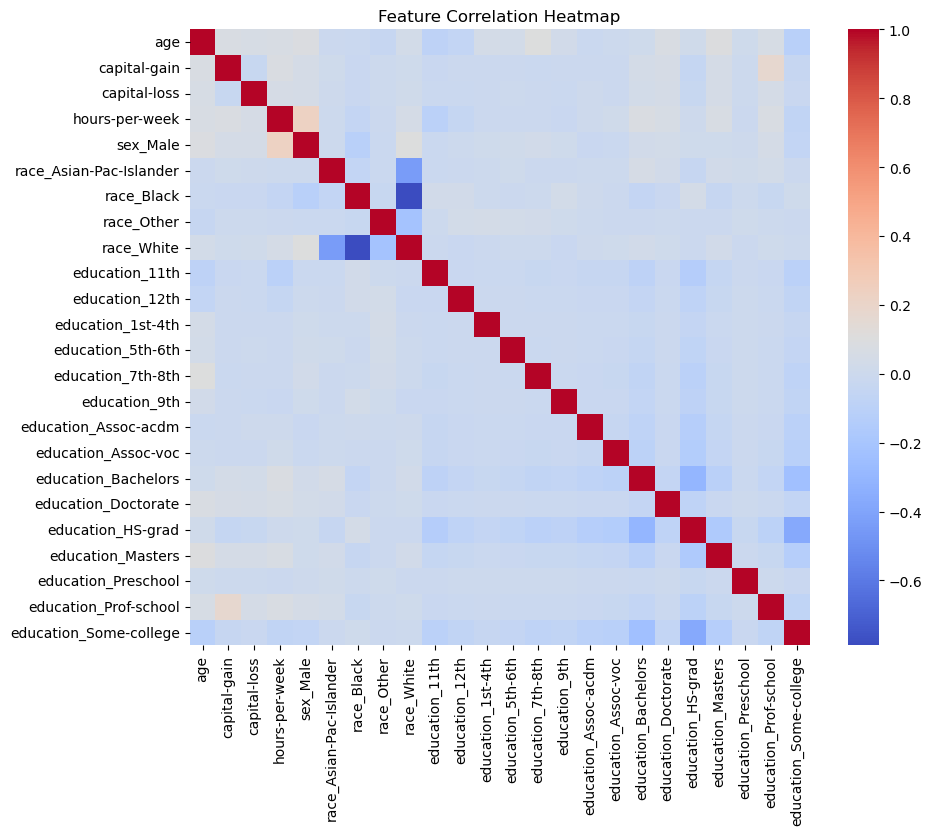

In [9]:
# -----------------------------
# 5. Correlation heatmap
# -----------------------------
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [10]:
# -----------------------------
# 6. Train-test split
# -----------------------------
x_train, x_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=1
)

In [12]:
# -----------------------------
# 7. Logistic Regression model
# -----------------------------
log_reg = LogisticRegression(
C=0.05,
penalty='l1',
solver='liblinear'
)


log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
print(y_pred)

[0 0 1 ... 0 0 1]


In [13]:
# -----------------------------
# 8. Model parameters
# -----------------------------
print("\nIntercept:")
print(log_reg.intercept_[0])


print("\nCoefficients:")
print(log_reg.coef_)


Intercept:
-5.407209717688099

Coefficients:
[[ 3.57057772e-02  3.14041368e-04  6.64948336e-04  3.08991102e-02
   1.01676649e+00  0.00000000e+00 -4.24477233e-01  0.00000000e+00
   1.68976154e-02 -5.88305279e-01  0.00000000e+00  0.00000000e+00
  -4.09472748e-01 -8.96150340e-01 -5.08414196e-01  5.59602047e-01
   5.34673155e-01  1.26843355e+00  1.78908491e+00  0.00000000e+00
   1.58728742e+00  0.00000000e+00  1.81399051e+00  3.72200132e-01]]


In [14]:
# -----------------------------
# 9. Model evaluation
# -----------------------------
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")


Confusion Matrix:
[[4785  241]
 [ 880  607]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.90      5026
           1       0.72      0.41      0.52      1487

    accuracy                           0.83      6513
   macro avg       0.78      0.68      0.71      6513
weighted avg       0.82      0.83      0.81      6513

Accuracy Score: 0.8279



Important Features:
                   Feature  Coefficient
13       education_7th-8th    -0.896150
9           education_11th    -0.588305
14           education_9th    -0.508414
6               race_Black    -0.424477
12       education_5th-6th    -0.409473
1             capital-gain     0.000314
2             capital-loss     0.000665
8               race_White     0.016898
3           hours-per-week     0.030899
0                      age     0.035706
23  education_Some-college     0.372200
16     education_Assoc-voc     0.534673
15    education_Assoc-acdm     0.559602
4                 sex_Male     1.016766
17     education_Bachelors     1.268434
20       education_Masters     1.587287
18     education_Doctorate     1.789085
22   education_Prof-school     1.813991


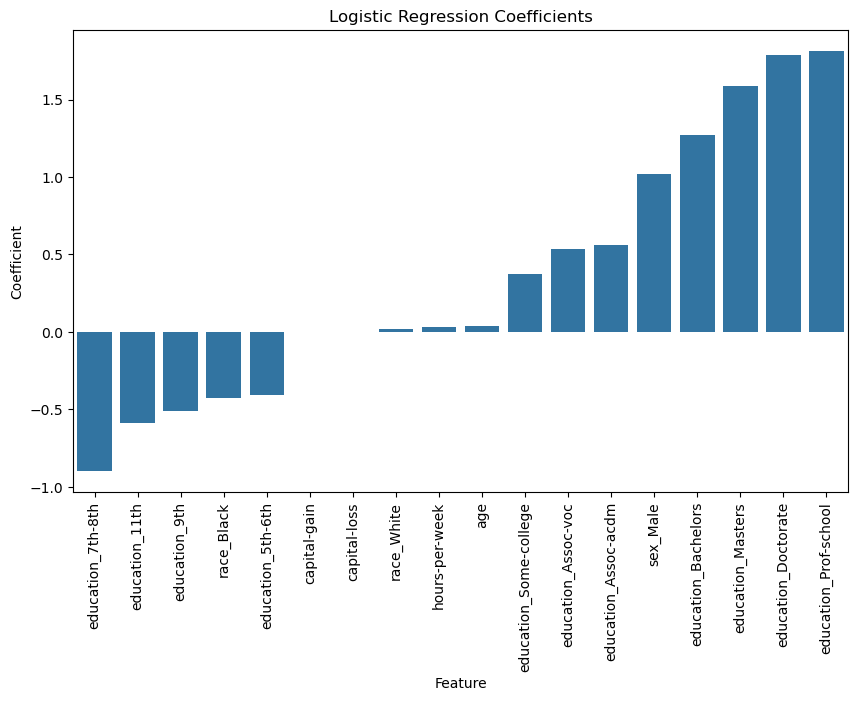

In [15]:
# -----------------------------
# 10. Coefficient analysis
# -----------------------------
coef_df = (
pd.DataFrame({
'Feature': x_train.columns,
'Coefficient': log_reg.coef_[0]
})
.query('Coefficient != 0')
.sort_values('Coefficient')
)


print("\nImportant Features:")
print(coef_df)


plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Feature', y='Coefficient')
plt.xticks(rotation=90)
plt.title('Logistic Regression Coefficients')
plt.show()

ROC AUC Score: 0.8453


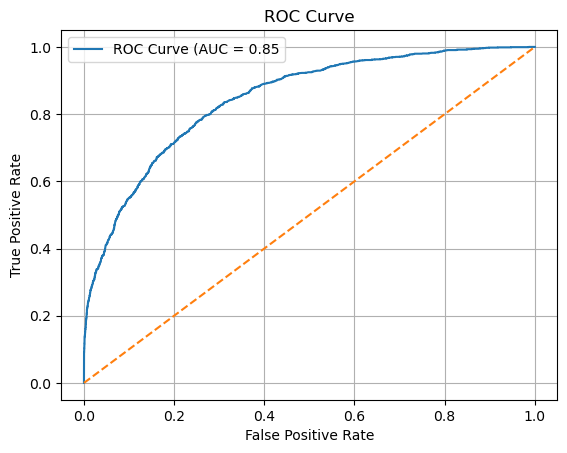

In [16]:
# -----------------------------
# 11. ROC Curve & AUC
# -----------------------------
y_pred_prob = log_reg.predict_proba(x_test)[:, 1]


roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")


fpr, tpr, _ = roc_curve(y_test, y_pred_prob)


plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()